# **Lab Distributed Data Analytics**

## Tutorial 8

### 1. Linear regression

In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
X = torch.arange (0.0 , 1.0 , step =0.01)
X2 = torch.randint(low=0, high=2, size=(len(X),)) #Returns a tensor filled with random integers generated uniformly between low (inclusive) and high (exclusive).
Y = (X*0.7 + X2*0.2 - 0.3) + torch.normal(mean=0, std=0.1 , size=(len(X),))

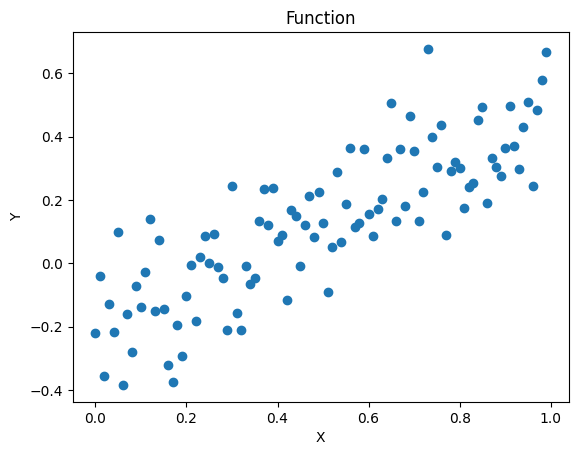

In [ ]:
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Function')
plt.show()

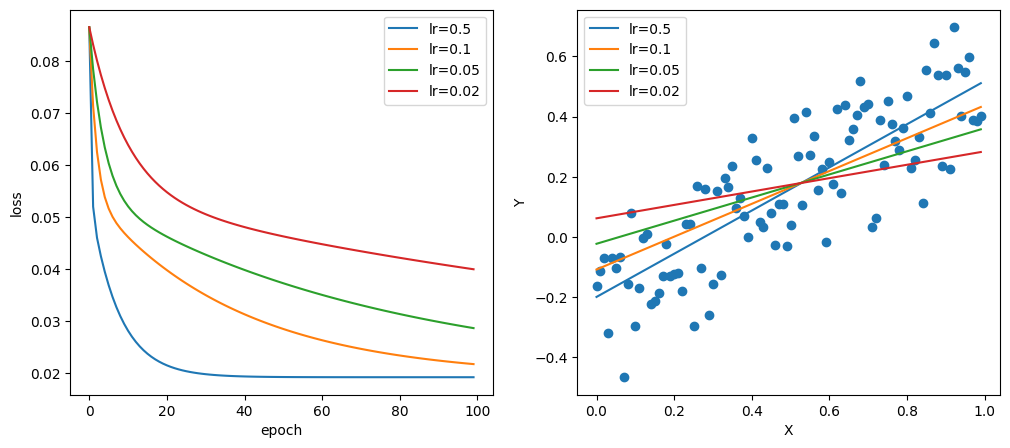

In [ ]:
#Gradient descent method
num_epochs = 100 #maximum number of ephocs
lrs = [0.5,0.1,0.05,0.02] #learning rate

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(12,5))

ax2.scatter(X, Y)

for lr in lrs:
  a = torch.tensor([0.,], requires_grad=True)
  b = torch.tensor([0.,], requires_grad=True)

  opt = torch.optim.SGD([a,b], lr=lr)
  loss = torch.nn.MSELoss()
  loss_curve = list()

  for epoch in range(num_epochs):
      opt.zero_grad()
      y_hat = a*X + b
      loss_val = loss(y_hat, Y)
      loss_val.backward() #calculus of gradient ∇L(𝛉)
      opt.step()
      loss_curve.append(loss_val.detach())

  ax1.plot(loss_curve, label=f'lr={lr}')

  ax2.plot(X,y_hat.detach().numpy(), label=f'lr={lr}')


ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.legend()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.legend()
plt.show()

### 2. Wine regression

The wine dataset is a classic and very easy multi-class classification dataset

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()

X = data.data
Y = data.target
M = len(data.feature_names)
N = len(X)

X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y.reshape(-1,1), dtype=torch.float32)

1 hidden layer

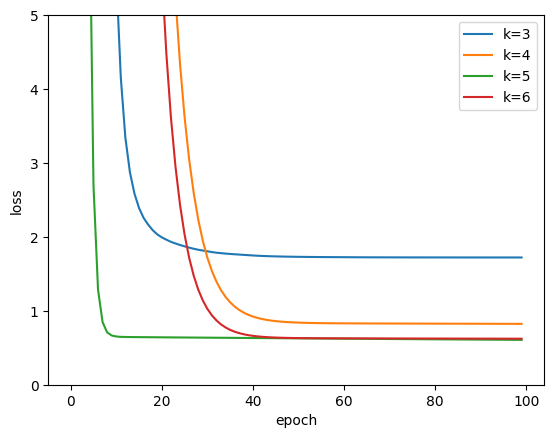

In [ ]:
#Gradient descent method
num_epochs = 100 #maximum number of ephocs
lr = 0.000001 #learning rate
K = [3,4,5,6] #latent dimension
for k in K:
  # model = torch.nn.Linear(in_features=M, out_features=1)
  model = torch.nn.Sequential(torch.nn.Linear(M , k),
                              torch.nn.ReLU(),
                              torch.nn.Linear(k,1)
  )

  opt = torch.optim.SGD(model.parameters(), lr=lr)
  loss = torch.nn.MSELoss()
  loss_curve = list()

  for epoch in range(num_epochs):
      opt.zero_grad()
      y_hat = model(X)
      loss_val = loss(y_hat, Y)
      loss_val.backward() #calculus of gradient ∇L(𝛉)
      opt.step()
      loss_curve.append(loss_val.detach())

  plt.plot(loss_curve,label=f'k={k}')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim((0,5))
plt.legend()
plt.show()

2 hidden layers

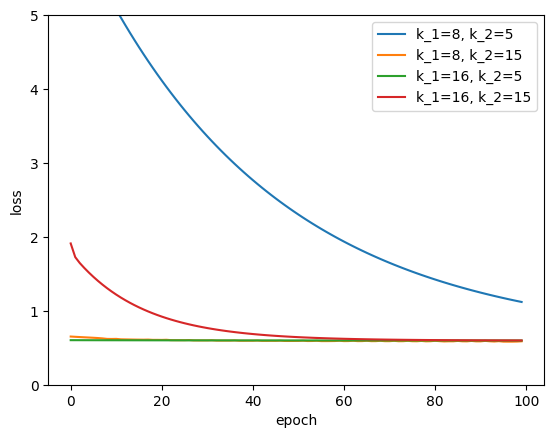

In [ ]:
#Gradient descent method
num_epochs = 100 #maximum number of ephocs
lr = 0.001 #learning rate
K1 = [8,16] #latent dimension
K2 = [5,15] #latent dimension

for k1 in K1:
  for k2 in K2:
    model = torch.nn.Sequential(torch.nn.Linear(M , k1),
                                torch.nn.ReLU(),
                                torch.nn.Linear(k1 , k2),
                                torch.nn.Tanh(),
                                torch.nn.Linear(k2,1)
    )

    opt = torch.optim.SGD(model.parameters(), lr=lr)
    loss = torch.nn.MSELoss()
    loss_curve = list()

    for epoch in range(num_epochs):
        opt.zero_grad()
        y_hat = model(X)
        loss_val = loss(y_hat, Y)
        loss_val.backward() #calculus of gradient ∇L(𝛉)
        opt.step()
        loss_curve.append(loss_val.detach())

    plt.plot(loss_curve[0:],label=f'k_1={k1}, k_2={k2}')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim((0,5))
plt.legend()
plt.show()